In [1]:
'''
Stock Trading Project

Using yfinance, sklearn, and pandas

ML algorithm with RandomForestClassifier

Looks at historical data for S&P500
'''

'\nStock Trading Project\n\nUsing yfinance, sklearn, and pandas\n\nML algorithm with RandomForestClassifier\n\nLooks at historical data for S&P500\n'

In [35]:
import yfinance as yf
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,0.0,0.0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,0.0,0.0
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,0.0,0.0


<Axes: xlabel='Date'>

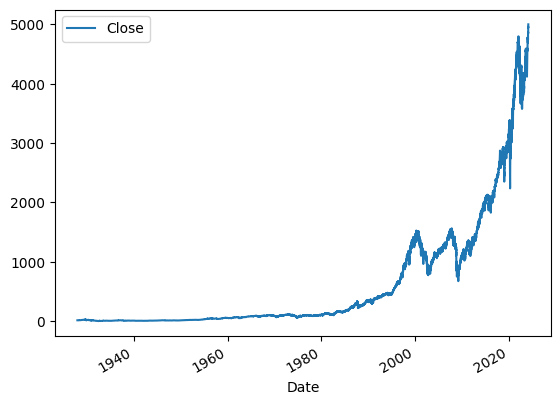

In [4]:
sp500.plot.line(y="Close", use_index=True)

In [5]:
# Removing Extra Columns

del sp500['Dividends']
del sp500['Stock Splits']

In [6]:
# Set up target

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [7]:
# Compares if tomorrows price is greater than todays closing price
# 1 = true, 0 = false

sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,4995.060059,1


In [9]:
# Removing all data before 1990

sp500 = sp500.loc["1990-01-01":].copy()

### Training

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1) 
# n_estimators -> number of decision trees
# min_sample_split -> to avoid overfitting
# random_state -> random numbers generated will have same results

train = sp500.iloc[:-100] # all rows except last 100
test = sp500.iloc[-100:] # last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) 

RandomForestClassifier(min_samples_split=50, n_estimators=200, random_state=1)

In [11]:
# Measure accuracy 

from sklearn.metrics import precision_score 

# what percentage of the time did the market actually go up when we said it would go up

preds = model.predict(test[predictors]) 

In [12]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [25]:
def predict(train, test, predictors, model): 
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #returns probability that a row is 0 or 1
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0 #model has to be more confident that price will go up to show that it will
    preds = pd.Series(preds, index=test.index, name="Predictions") 
    combined = pd.concat([test["Target"], preds], axis=1) 
    return combined

def backtest(data, model, predictors, start=2500, step=250):
    # start=2500 means take 10 years of data and train model on that
    # 250 trading days in a year
    # step=250 means train model for a year and move onto next year
    #    take 10 years, predict 11th; take 11 years, predict 12th; etc

    all_predictions = []
    for i in range(start, data.shape[0] + 1, step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [26]:
# variety of rolling avgs

horizons = [2,5,60,250,1000] # trading day, week, month, year, 4 years
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}" 
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [28]:
sp500 = sp500.dropna()

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26 00:00:00-05:00,950.820007,956.469971,950.820007,951.640015,487750000,955.400024,1,1.000431,2.0,0.997275,4.0,1.009111,33.0,1.113282,138.0,1.517046,563.0
1997-11-28 00:00:00-05:00,951.640015,959.130005,951.640015,955.400024,189070000,974.770020,1,1.001972,2.0,1.001967,4.0,1.012659,33.0,1.116599,139.0,1.521842,564.0
1997-12-01 00:00:00-05:00,955.400024,974.770020,955.400024,974.770020,590300000,971.679993,0,1.010035,2.0,1.019783,4.0,1.032356,34.0,1.138015,140.0,1.551433,564.0
1997-12-02 00:00:00-05:00,974.780029,976.200012,969.830017,971.679993,576120000,976.770020,1,0.998412,1.0,1.011259,4.0,1.028349,33.0,1.133204,140.0,1.545272,563.0
1997-12-03 00:00:00-05:00,971.679993,980.809998,966.159973,976.770020,624610000,973.099976,0,1.002612,1.0,1.011095,4.0,1.032949,33.0,1.137882,141.0,1.552105,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,4958.609863,1,1.006208,1.0,1.001439,2.0,1.050393,39.0,1.126078,136.0,1.225211,527.0
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0,1.005314,2.0,1.009351,3.0,1.059375,39.0,1.137251,137.0,1.237813,527.0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1,0.998404,1.0,1.005526,2.0,1.053882,38.0,1.132763,137.0,1.233386,527.0


In [30]:
predictions = backtest(sp500, model, new_predictors)

In [31]:
predictions["Predictions"].value_counts()

Predictions
0.0    3530
1.0     561
Name: count, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"]) 

0.5650623885918004

In [33]:
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,4958.609863,1,1.006208,1.0,1.001439,2.0,1.050393,39.0,1.126078,136.0,1.225211,527.0
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0,1.005314,2.0,1.009351,3.0,1.059375,39.0,1.137251,137.0,1.237813,527.0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1,0.998404,1.0,1.005526,2.0,1.053882,38.0,1.132763,137.0,1.233386,527.0
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,4995.060059,1,1.001154,1.0,1.006651,3.0,1.054176,38.0,1.134558,137.0,1.235750,527.0
2024-02-07 00:00:00-05:00,4973.049805,4999.890137,4969.049805,4995.060059,4895590000,4997.910156,1,1.004104,2.0,1.008822,4.0,1.060428,39.0,1.142990,138.0,1.245430,528.0
